#  Projet numérique, choix du pas de temps

Ce projet a pour but d'optimiser la résolution d'équation différentielle en adaptant le pas de temps des schémas de résolution au cours de celle-ci.
C'est à dire que l'on se munit d'une fonction $ f(x,t) $ et on cherche à résoudre l'équation $ \dot{x}=f(x,t) $ ,en connaissant $x_0=f(t_0)$ et on cherche à calculer $ f(t_0+\Delta t_0),f(t_0+\Delta t_0 +\Delta t_1),...,f(t_{max}) $ 
Pour cela les méthodes numériques se basent sur la représentation intégrale:
$$ x(t) = x_0 + \int_{t_0}^{t_{max}} f(s,x(s)) ds = x_0 + \sum_{j=0}^{J-1} \int_{t_j}^{t_{j+1}}f(s,x(s)) ds $$ où $t_0 < t_1 < \ldots < t_J$ avec $t_J=t_{max}$. L'idée est d'approximer les intégrales $\int_{t_j}^{t_{j+1}}f(s,x(s))$ sur des intervalles $[t_j,t_{j+1}]$ suffisamment petits.

## Pas fixe

On se propose dans un premier temps d'étudier la convergence de différents schémas avec un pas de temps fixe. C'est à dire qu'on a un $\Delta t$ tel que $\forall j \in [0,J-1], t_{j+1}-t_j= \Delta t $

### Euler Explicite

Cette méthode consiste à approximer l'intégrale par l'aire d'un rectangle déterminé par la valeur initiale de $f$ à gauche de l'intervalle, c'est à dire
$$ x^{j+1} = x^j + \Delta t_j \cdot f(t_j,x^j) \ . $$



#### Résolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
def solve_euler_explicit(f,x0,dt,t0=0,tf=1):
    """
    Cette fonction résout une équation différentielle à l'aide de la méthode d'Euler avec un pas de temps dt fixé
    et renvoie les tableaux des t et des x au cours de la résolution
    """
    s=floor(tf/dt)
    t = [k*dt for k in range(s+1)]
    x = np.zeros((s+1))
    x[0]=x0
    for k in range(0,s):
        x[k+1]=x[k]+dt*f(t[k],x[k])
    return t,x

def solve_euler_explicit_2(f,x0,dt,t0=0,tf=1):
    """
    Nous avons décidé de résoudre des équations différentielles d'ordre 2, d'où l'utilité de cette deuxième fonction
    """
    s=floor(tf/dt)
    t = [k*dt for k in range(s+1)]
    x = np.zeros((s+1,2))
    x[0]=x0
    for k in range(0,s):
        x[k+1]=x[k]+dt*f(t[k],x[k])
    return t,x

On rappelle que toute équation différentielle en dimension 1 d'ordre n peut être ramenée à une équation en dimension n d'ordre 1 en étudiant la variable 
$\begin{pmatrix}
    x \\ x' \\... \\ x^{(n)} \end{pmatrix} $
C'est pour cela qu'ici on a besoin de stocker $ x$ et $x'$ dans le vecteur x

Dans tout ce projet nous utiliserons cette fonction $f$ qui représente l'équation différentielle $x''+x=0$

In [3]:
def f(t,x):
    return np.array([x[1],-x[0]])

c:\users\adrien\miniconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


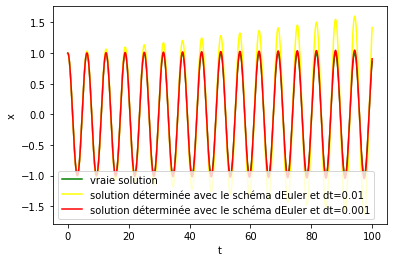

In [4]:
te,xe=(solve_euler_explicit_2(f,[1,0],0.01,0,100))
te2,xe2=(solve_euler_explicit_2(f,[1,0],0.001,0,100))
ts=te2
xs=[]
for a in ts:
    xs.append(cos(a))
plt.plot(ts,xs,label='vraie solution',color='green')
plt.plot(te,xe[::,0],label='solution déterminée avec le schéma dEuler et dt=0.01',color='yellow')
plt.plot(te2,xe2[::,0],label='solution déterminée avec le schéma dEuler et dt=0.001',color='red')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

Dans ce code on prend comme conditions initiales $x(0)=1,x'(0)=0$, la solution réelle sera donc donnée par $x(t)=\cos(x)$
On voit qu'avec un pas de 0.001 la solution donnée par Euler est très proche de la vraie solution dans cet intervalle de temps, cependant avec dt=0.01 la solution donnée par Euler s'éloigne de la vraie solution.


#### Convergence

On va donc chercher à illustrer la convergence du schéma d'Euler à l'ordre 1. 
Rappelons la notion de convergence:

Soit $\Delta t = \max_{0 \leq j \leq J-1} \Delta t_j$. Un schéma numérique est convergent si $$ \lim_{\Delta t \to 0} \max_{1 \leq j \leq J} |x^j - x(t_j)| = 0 $$ lorsque $x^0 = x(t_0)$. S'il existe $p\in \mathbb{N}^{*}$ et $c_v>0$ (indépendant de $\Delta t$) tel que $$ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v (\Delta t)^{p} $$ on dit que le schéma est convergent à l'ordre $p$.

In [5]:
cost=np.vectorize(cos)
abst=np.vectorize(abs)
def square(x):
    return x*x
np.vectorize(square)
def cube(x):
    return x*x*x
np.vectorize(cube)

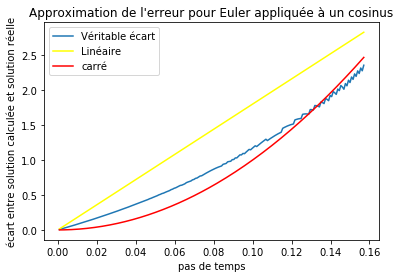

In [7]:
tf=5*pi
dt=pi/20
x0=[1,0]
e=[]
for k in range(200):
    t,x=solve_euler_explicit_2(f,x0,dt,0,tf)
    finx =np.array(x[-10:,0])
    fint=np.array(t[-10:])
#Pour éviter de devoir chercher le maximum de l'écart sur tout le tableau, on le suppose atteint sur les 10 derniers points
#de la simulation ce qui est souvent le cas puisque l'on s'arrangera pour terminer la simulation au sommmet d'un pic du cos
    vraisx=cost(fint)
    comparaison= abst(finx-vraisx)
    e.append([dt,max(comparaison)])
#e stocke les valeurs de l'erreur de calcul maximale pour différents dt
    dt=dt-pi/4000
e2=np.zeros((2,200))
for k in range(200):
    e2[0][k]=e[k][0]
    e2[1][k]=e[k][1]

plt.plot(e2[0],e2[1],label='Véritable écart')
#Pour voir que la convergence est bien d'ordre 1 on va essayer de majorer l'écart par une droite et par une parabole passant
#toutes les 2 par l'origine
plt.plot(e2[0],18*e2[0],color='yellow',label='Linéaire')
plt.plot(e2[0],100*square(e2[0]),color='red',label='carré')
plt.legend()
#les valeurs 18 et 100 sont choisies pour avoir des courbes le plus proche possible de l'erreur réelle
plt.xlabel('pas de temps')
plt.ylabel('écart entre solution calculée et solution réelle')
plt.title("Approximation de l'erreur pour Euler appliquée à un cosinus")

plt.show()

D'après ce graphique on voit d'une part que l'erreur $e(\Delta t)= max(|x_j-x(t_j)|)$ tend bien vers 0 quand $\Delta t$ tend vers 0, donc le schéma d'Euler est convergent.
Mais il est impossible de majorer l'écart par une parabole, car elle commencera forcément en dessous de la courbe de l'écart. Ici (pour $c_v = 100$) c'est à partir de $\Delta t=0.13$ que $100*(\Delta t)^2 > e(\Delta t)$ , avec  $c_v = 1000$ c'est à partir de $\Delta t=0.008$ que $1000*(\Delta t)^2 > e(\Delta t)$.
En revanche avec une droite, on arrive à majorer l'erreur pour tout $\Delta t $.

Ainsi on a une illustration de la convergence d'ordre 1 du schéma d'Euler explicite, et un exemple de non convergence d'ordre 2. 

### Runge-Kutta d'ordre 2

Dans un second temps on cherche à utiliser un schéma d'ordre 2 pour résoudre cette équation différentielle. Nous avons choisi d'utiliser la méthode de Runge-Kutta d'ordre 2. Cette méthode consiste à approximer $x_{j+1}$ comme suit:
$x_{j+1}= x_j +dtf(t_j+\frac{dt}{2},x_j+\frac{dt}{2}f(x_j,t_j))$

In [8]:
def solve_rk_2(f,x0,dt,t0=0,tf=1):
    """
    Cette fonction résout une équation différentielle à l'aide de la méthode de Runge-Kutta-2 et renvoie les tableaux des t et des x au cours de la résolution
    """
    s=floor(tf/dt)
    t = [k*dt for k in range(s+1)]
    x = np.zeros((s+1))
    x[0]=x0
    for k in range(0,s):
        x[k+1]=x[k]+dt*f(t[k]+dt/2,x[k]+dt/2*f(t[k],x[k]))
    return t,x

def solve_rk_2_2(f,x0,dt,t0=0,tf=1):
    """
    Nous avons décidé de résoudre des équations différentielles d'ordre 2, d'où l'utilité de cette deuxième fonction
    """
    s=floor(tf/dt)
    t = [k*dt for k in range(s+1)]
    x = np.zeros((s+1,2))
    x[0]=x0
    for k in range(0,s):
        x[k+1]=x[k]+dt*f(t[k]+dt/2,x[k]+dt/2*f(t[k],x[k]))
    return t,x

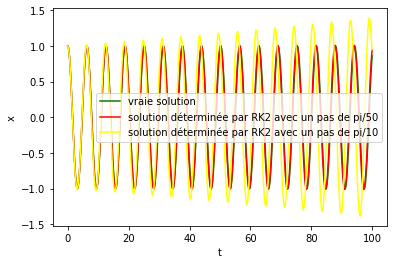

In [9]:
tr,xr=(solve_rk_2_2(f,[1,0],0.1,0,100))
tr2,xr2=(solve_rk_2_2(f,[1,0],0.3,0,100))

ts=tr
xs=[]
for a in ts:
    xs.append(cos(a))
plt.plot(ts,xs,label='vraie solution',color='green')
plt.plot(tr,xr[::,0],label='solution déterminée par RK2 avec un pas de pi/50',color='red')
plt.plot(tr2,xr2[::,0],label='solution déterminée par RK2 avec un pas de pi/10',color='yellow')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()


Comme pour la méthode d'Euler, avec un pas suffisamment petit on se rapproche très près de la solution exacte, mais avec un pas trop grand on s'en éloigne. On remarque quand même que pour un pas de temps et un $t_f$ donnés, l'erreur est bien plus petite avec cette méthode. Ainsi avec $\Delta t= 0.01$ l'erreur est d'environ 0.5 pour Euler alors qu'elle est négligeable pour RK2

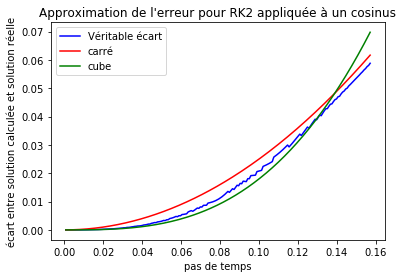

In [11]:
tf=5*pi
dt=pi/20
x0=[1,0]
r=[]
for k in range(200):
    t,x=solve_rk_2_2(f,x0,dt,0,tf)
    finx =np.array(x[-10:,0])
    fint=np.array(t[-10:])
    vraisx=cost(fint)
    comparaison= abst(finx-vraisx)
    r.append([dt,max(comparaison)])
    dt=dt-pi/4000
r2=np.zeros((2,200))
for k in range(200):
    r2[0][k]=r[k][0]
    r2[1][k]=r[k][1]

plt.plot(r2[0],r2[1],label='Véritable écart',color='blue')
plt.plot(r2[0],(2.5*square(r2[0])),color='red',label='carré')
plt.plot(r2[0],(18*cube(r2[0])),color='green',label='cube')
plt.legend() 
plt.xlabel('pas de temps')
plt.ylabel('écart entre solution calculée et solution réelle')
plt.title("Approximation de l'erreur pour RK2 appliquée à un cosinus")
plt.show()


Ce graphique permet de voir que ce schéma est bien convergent puisque l'erreur $e(\Delta t)= max(|x_j-x(t_j)|)$ tend bien vers 0 quand $\Delta t$ tend vers 0. D'autre part on arrive bien à majorer l'erreur avec une fonction carré de $\Delta t$ mais il n'est pas possible de la majorer par une fonction cube par le même argument que pour la non-convergence d'ordre 2 du schéma d'Euler.
Donc la méthode de RK-2 est convergente d'ordre 2.

## Adaptation du pas de temps

On décide dans cette partie d'adapter le pas de temps choisi à chaque itération pour garantir un seuil d'erreur tolérée. On note $e^j = x(t_j) - x^j$ l'erreur locale commise à chaque et $\texttt{Tol}_{abs}$ l'erreur maximale tolérée.

On cherche d'abord à montrer que si $f$ est de classe $C^1$, on a pour un schéma d'Euler explicite
$$ \|e^{j+1}\| = \Delta t_j  \frac{\|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\|}{2} + O(\Delta t_j^3) \ $$

Soit $f$ de classe $C^1$, on a pour un schéma d'Euler explicite:

$$ e^{j+1}  = \tilde{x}(t_{j+1})- \left(x^{j} + \Delta t_j f(t_j,x^j)\right) $$
où $\tilde{x}$ est la solution de $\dot{x}(t)=f(t,x)$ qui serait initialisée à $x^j$ au temps $t_j$.

Afin d'alléger les notations, on notera $\tilde{x} = x$ et on aura ainsi $x^j = x(t_j)$ pour la suite de la démonstration.

$f$ de classe $C^1$ donne $x$ de classe $C^2$. On a donc :
$$ x(t_j + \Delta t_j) = x^j + \Delta t_j f(t_j,x^j) + \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3) $$

D'autre part, $\dot{x}(t)=f(t,x)$ donne : 
$$ \ddot{x}(t_j) = \partial_t f(t_j,x^j)+ \partial_x f(t_j,x^j)\cdot f(t_j,x^j) $$

Or $f$ de classe $C^1$ donne :
$$f(t_j + \Delta t_j, x^j + \Delta t_j f(t_j,x^j)) = f(t_j,x^j)+ \partial_t f(t_j,x^j) \Delta t_j +  \partial_x f(t_j,x^j)\cdot f(t_j,x^j)\Delta t_j + O(\Delta t_j^2) $$

D'où : 
$$ \partial_t f(t_j,x^j) +  \partial_x f(t_j,x^j)\cdot f(t_j,x^j) = \frac{f(t_{j+1},x^{j+1}) - f(t_j,x^j)}{\Delta t_j} + O(\Delta t_j)$$

On a donc:
$$ x(t_{j+1}) = x^j + \Delta t_j f(t_j,x^j) + \frac{\Delta t_j^2}{2} \frac{f(t_{j+1},x^{j+1}) - f(t_j,x^j)}{\Delta t_j} + O(\Delta t_j^3) $$   

Et on obtient bien:
$$ \|e^{j+1}\| = \Delta t_j  \frac{\|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\|}{2} + O(\Delta t_j^3) \ $$

Par ailleurs, le schéma d'Euler explicite est convergent d'ordre 1 donc $\|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\| = O(\Delta t_j)$ d'où à l'aide de la formule précédente, $e^{j+1} = O(\Delta t_j^2)$

On choisit pour adapter le pas de temps à chaque étape de prendre :
$$ \Delta t_{j+1} = \Delta t_j \sqrt{\frac{\texttt{Tol}_{abs}}{\|e^{j+1}\|}} $$

On peut en effet approximer $e^{j+1} \simeq c_{j+1} \cdot \Delta t_j^2$. On a alors $\Delta t^{j+1} \simeq \sqrt{\frac{\texttt{Tol}_{abs}}{c_{j+1}}}$. Donc $e^{j+2} \simeq c_{j+2} \cdot \Delta t_{j+1}^2$ donne $e^{j+2} \simeq \texttt{Tol}_{abs}\frac{c_{j+2}}{c_{j+1}}$. En admettant que $c_{j+2}$ et $c_{j+1}$ sont assez proches quitte à prendre une marge d'erreur, on peut garantir la condition recherchée.

Le code suivant met en pratique la méthode d'Euler avec adaptation du pas de temps.

In [14]:
def j(x):
    return np.array([x[1],-x[0]])

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:  #On vérifie que l'on ne dépasse par t_f comme dans la méthode classique
        while ti < dtmax:  #On calcule finement la solution entre t et t + dtmax à l'aide de la méthode de variation du pas de temps
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x) #On applique la méthode d'Euler classique dans le bon sens
            x_back = x_next - dt * f(x_next) #On revient en arrière en ré-utilisant la méthode d'Euler
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2) #La différence entre x_back et x permet d'estimer l'erreur commise comme démontré précédemment
            dt = 0.9 * dt * sqrt(ratio_abs_error) #Puis on applique la formule retenue pour ajuster le pas de temps en prenant une marge de 0.9
            if dt < dtmin: #On utilise un pas de temps minimum pour éviter que le calcul deviennent trop long à force de ré-ajuster le pas de temps à la baisse
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: #Si le nouveau pas de temps est trop grand, on le ramène à dtmax/2 pour éviter un trop grand dépassement de dtmax
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next #On redéfinit finalement les valeurs de t,ti et x comme dans la méthode classique pour passer à l'itération suivante
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x) #On revient ensuite en arrière pour arriver à x(t+dtmax) et continuer le calcul à pas constant
        ts = np.vstack((ts,[t_next])) #On ajoute enfin les approximations dans la liste des solutions estimées
        xs = np.vstack((xs,[x_next]))
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

L'algorithme renvoie comme dans la méthode classique une estimation de la valeur de $x$ tous les $\Delta t_{max}$ avec un $\Delta t_{max}$ constant à chaque itération. Cependant, entre chaque $\Delta t_{max}$, on utilise la méthode précédemment décrite en adaptant le pas de temps pour calculer plus finement les valeurs de $x$ à chaque étape. On défini donc un $\Delta t$ plus fin qui permet de régler le calcul finement et une fois le $\Delta t_{max}$ dépassé, on revient en arrière pour obtenir les valeurs recherchées. Le détail des explications est mis en commentaire du code à chaque ligne.

On teste cette fonction sur l'équation différentielle associée au cosinus comme dans la partie précédente.

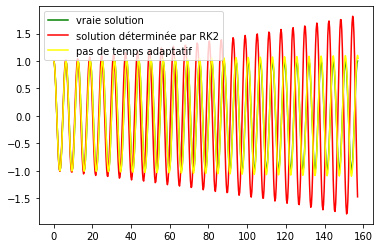

In [16]:
tss,xss=solve_ivp_euler_explicit_variable_step(j,0,np.array([1,0]),50*pi,1e-16,pi/10)
tr,xr=(solve_rk_2_2(f,[1,0],pi/10,0,50*pi))
ts=tr
xs=[]
for a in ts:
    xs.append(cos(a))
plt.plot(ts,xs,label='vraie solution',color='green')
plt.plot(tr,xr[::,0],label='solution déterminée par RK2',color='red')
plt.plot(tss,xss[0],label='pas de temps adaptatif', color='yellow')
plt.legend()
plt.show()

On remarque que l'approximation semble plus précise que celle donnée par la méthode de Runge-Kutta d'ordre 2. On effectue donc les tests sur la marge d'erreur obtenue à chaque itération comme précédemment.

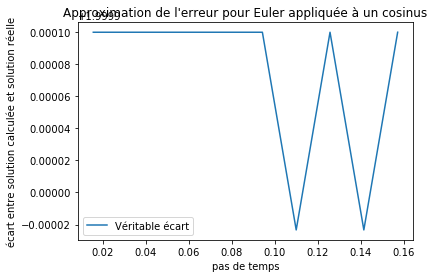

In [17]:
tf=5*pi
dt=pi/20
x0=[1,0]
e=[]
for k in range(10):
    ts,xs=solve_ivp_euler_explicit_variable_step(j,0,[1,0],5*pi,1e-16,dt)
    vraisx=cost(ts)
    comparaison= abst(xs.T[0] - vraisx)
    e.append([dt,np.max(comparaison)])
    dt=dt-pi/200
e2=np.zeros((2,10))
for k in range(10):
    e2[0][k]=e[k][0]
    e2[1][k]=e[k][1]

plt.plot(e2[0],e2[1],label='Véritable écart')
plt.legend()
plt.xlabel('pas de temps')
plt.ylabel('écart entre solution calculée et solution réelle')
plt.title("Approximation de l'erreur pour Euler appliquée à un cosinus")
plt.show()

L'erreur obtenue semble constante mis à part quelques valeurs négatives obtenues après passage à la valeur absolue que nous ne nous sommes pas expliquées. On considère donc que l'objectif recherché est atteint.

$\textit{Adrien Moulinas, Alexis Roux}$